<a href="https://colab.research.google.com/github/fauzanismara/belajarpenelitian/blob/main/Penelitian1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# =========================================
# 1. Mount Google Drive
# =========================================
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
# =========================================
# 2. Import library
# =========================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [14]:
# =========================================
# 3. Bagi dataset otomatis (train/val/test)
# =========================================
import os
import shutil
import random
import imghdr

source_dir = "/content/gdrive/MyDrive/data_penelitian/Tanpa_Pewarnaan"  # folder awal
destination_dir = "/content/gdrive/MyDrive/dataset_Tanpa_Pewarnaan_Split"

train_ratio = 0.7
val_ratio = 0.1
test_ratio = 0.2

# Buat folder train/val/test
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(destination_dir, split), exist_ok=True)

# Loop setiap kelas
classes = os.listdir(source_dir)
for cls in classes:
    cls_source = os.path.join(source_dir, cls)
    if not os.path.isdir(cls_source):
        continue  # skip kalau bukan folder kelas

    print(f"Memproses kelas: {cls}")

    # Ambil semua file gambar dari subfolder juga
    all_images = []
    for root, _, files in os.walk(cls_source):
        for f in files:
            fpath = os.path.join(root, f)
            # hanya ambil gambar valid
            if os.path.isfile(fpath) and imghdr.what(fpath) is not None:
                all_images.append(fpath)

    # Acak urutan gambar
    random.shuffle(all_images)

    # Hitung jumlah untuk tiap split
    n_total = len(all_images)
    n_train = int(train_ratio * n_total)
    n_val = int(val_ratio * n_total)
    # sisanya untuk test
    n_test = n_total - n_train - n_val

    # Bagi dataset
    train_files = all_images[:n_train]
    val_files = all_images[n_train:n_train+n_val]
    test_files = all_images[n_train+n_val:]

    splits = {"train": train_files, "val": val_files, "test": test_files}

    # Copy ke folder tujuan
    for split_name, file_list in splits.items():
        split_cls_dir = os.path.join(destination_dir, split_name, cls)
        os.makedirs(split_cls_dir, exist_ok=True)

        for src_path in file_list:
            fname = os.path.basename(src_path)
            dst_path = os.path.join(split_cls_dir, fname)
            shutil.copy(src_path, dst_path)

    print(f"Kelas {cls}: {n_total} gambar → train={len(train_files)}, val={len(val_files)}, test={len(test_files)}")

print("✅ Dataset selesai di-split!")




/tmp/ipython-input-950204713.py:7: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Memproses kelas: Kelas1_Dedak 100_
Kelas Kelas1_Dedak 100_: 200 gambar → train=140, val=20, test=40
Memproses kelas: Kelas2_Dedak 90_
Kelas Kelas2_Dedak 90_: 200 gambar → train=140, val=20, test=40
Memproses kelas: Kelas3_Dedak 80_
Kelas Kelas3_Dedak 80_: 200 gambar → train=140, val=20, test=40
Memproses kelas: Kelas4_Dedak 70_
Kelas Kelas4_Dedak 70_: 200 gambar → train=140, val=20, test=40
Memproses kelas: Kelas5_Dedak 60_
Kelas Kelas5_Dedak 60_: 200 gambar → train=140, val=20, test=40
Memproses kelas: Kelas6_Sekam 100_
Kelas Kelas6_Sekam 100_: 200 gambar → train=140, val=20, test=40
✅ Dataset selesai di-split!


Found 840 images belonging to 6 classes.
Found 120 images belonging to 6 classes.
Found 240 images belonging to 6 classes.
Train: 840
Val: 120
Test: 240


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 312s 11s/step - accuracy: 0.1757 - loss: 3.4150 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 240s 9s/step - accuracy: 0.1718 - loss: 1.7921 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 240s 9s/step - accuracy: 0.1395 - loss: 1.7919 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 238s 9s/step - accuracy: 0.1629 - loss: 1.7920 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 235s 9s/step - accuracy: 0.1449 - loss: 1.7919 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 234s 9s/step - accuracy: 0.1652 - loss: 1.7918 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 235s 9s/step - accuracy: 0.1478 - loss: 1.7919 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 238s 9s/step - accuracy: 0.1406 - loss: 1.7920 - val_accuracy: 0.1667 - 

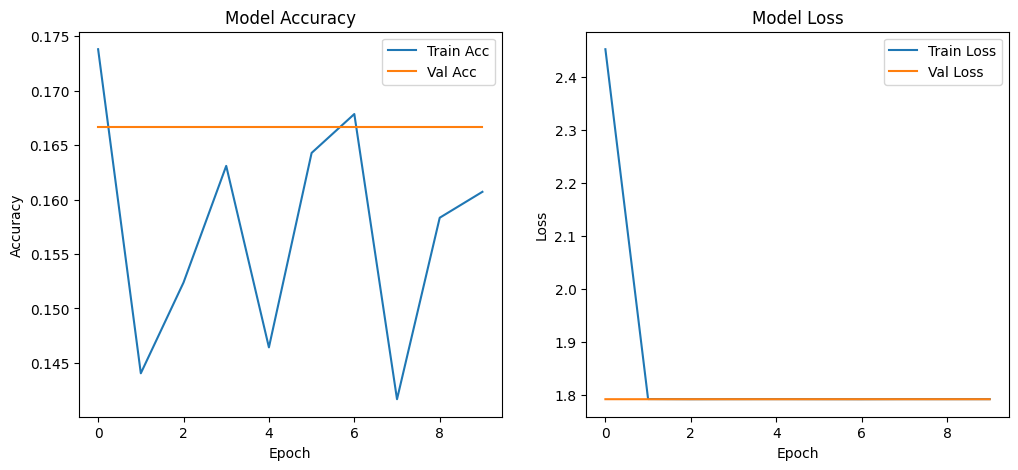

8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step


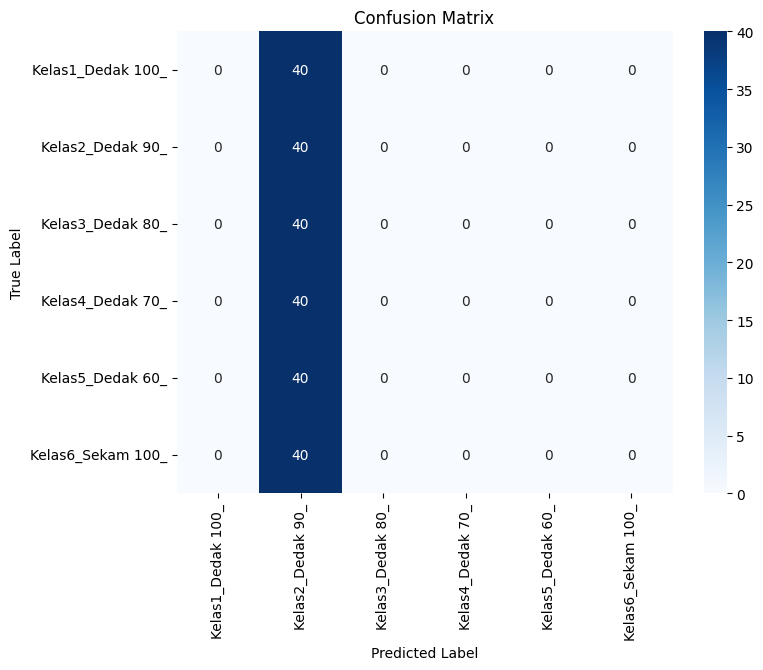

Classification Report:

                   precision    recall  f1-score   support

Kelas1_Dedak 100_       0.00      0.00      0.00        40
 Kelas2_Dedak 90_       0.17      1.00      0.29        40
 Kelas3_Dedak 80_       0.00      0.00      0.00        40
 Kelas4_Dedak 70_       0.00      0.00      0.00        40
 Kelas5_Dedak 60_       0.00      0.00      0.00        40
Kelas6_Sekam 100_       0.00      0.00      0.00        40

         accuracy                           0.17       240
        macro avg       0.03      0.17      0.05       240
     weighted avg       0.03      0.17      0.05       240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
import os
import glob


from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Path dataset hasil split
dataset_dir = "/content/gdrive/MyDrive/dataset_Tanpa_Pewarnaan_Split"

train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

# Data generator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

print("Train:", len(glob.glob(train_dir + "/**/*.jpg", recursive=True)))
print("Val:", len(glob.glob(val_dir + "/**/*.jpg", recursive=True)))
print("Test:", len(glob.glob(test_dir + "/**/*.jpg", recursive=True)))



# ======================
# 1. Bangun model CNN

# ======================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

num_classes = len(train_gen.class_indices)  # otomatis sesuai jumlah kelas

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ======================
# 2. Training
# ======================
history = model.fit(
    train_gen,
    epochs=10,  # bisa diganti
    validation_data=val_gen
)

# ======================
# 3. Evaluasi model di test set
# ======================
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ======================
# 4. Visualisasi akurasi & loss
# ======================
plt.figure(figsize=(12,5))

# akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# ======================
# 5. Confusion Matrix & Classification Report
# ======================
# prediksi kelas di test set
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

